# Test pour la creation de la carte

In [ ]:
# Package importation
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

: 

In [ ]:
# Load the shapefile (ci region boundary data) with geopandas
shapefile_path = "data\\shp\\Limite des région 2018.shp"  # Replace with the actual path to your shapefile
gdf = gpd.read_file(shapefile_path)
gdf.head()

: 

In [ ]:
# Read the csv file with random data set
data_path = "/Users/macbookair/Desktop/CartographieMETFPA/carte-dynamique/data/csv/data_model.csv"
df = pd.read_csv(data_path)
df.head()

,Num,Name,data
0,0,Agneby-Tiassa,945
1,1,Bafing,666
2,2,Bagoue,298
3,3,Belier,891
4,4,Bere,1292


In [ ]:

# Function for a simple plotting
def plot_data(geodf, label_column="Name",legende_title="Titre de la légende", title="Titre de la carte"):
    """
    Plot a GeoDataFrame with categorical coloring and a legend

    Parameters:
    -----------
    geodf : GeoDataFrame
        The input GeoDataFrame to be plotted
    label_column : str, optional
        The column to use for categorization and coloring (default is "Name")
    legende_title : str, optional
        The text to us to set the title of the legend (default is "Titre de la légende")
    title : str, optional
        The text to us to set the title of the map (default is "Titre de la carte")
    Returns:
    --------
    matplotlib.figure.Figure
        The created figure object
    """
    # Create the plot
    fig, ax = plt.subplots(figsize=(35, 12))

    # Get unique categories
    unique_categories = geodf[label_column].unique()

    # Create a color map for categorical data (viridis is a color palette used here)
    # We can change the color palette by changing the cmap parameter with on off
        # "Viridis", "Plasma", "Inferno", "Magma", "Cividis",
        # "Blues", "Greens", "Reds", "Oranges", "Purples"
    cmap = plt.cm.get_cmap('viridis', len(unique_categories))

    # Create a color mapping
    color_mapping = {category: cmap(i) for i, category in enumerate(unique_categories)}

    # Plot with categorical colors
    geodf.plot(
        column=label_column,
        ax=ax,
        categorical=True,
        legend=True,
        cmap=cmap,
        edgecolor='black'
    )
    plt.legend(
        handles,
        unique_categories,
        title=legende_title,
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        borderaxespad=0.
    )

    plt.title(title)
    plt.tight_layout()

    return fig  # Return the figure object instead of showing it

C:\Users\kanic\AppData\Local\Temp\ipykernel_30716\624447754.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(unique_categories))


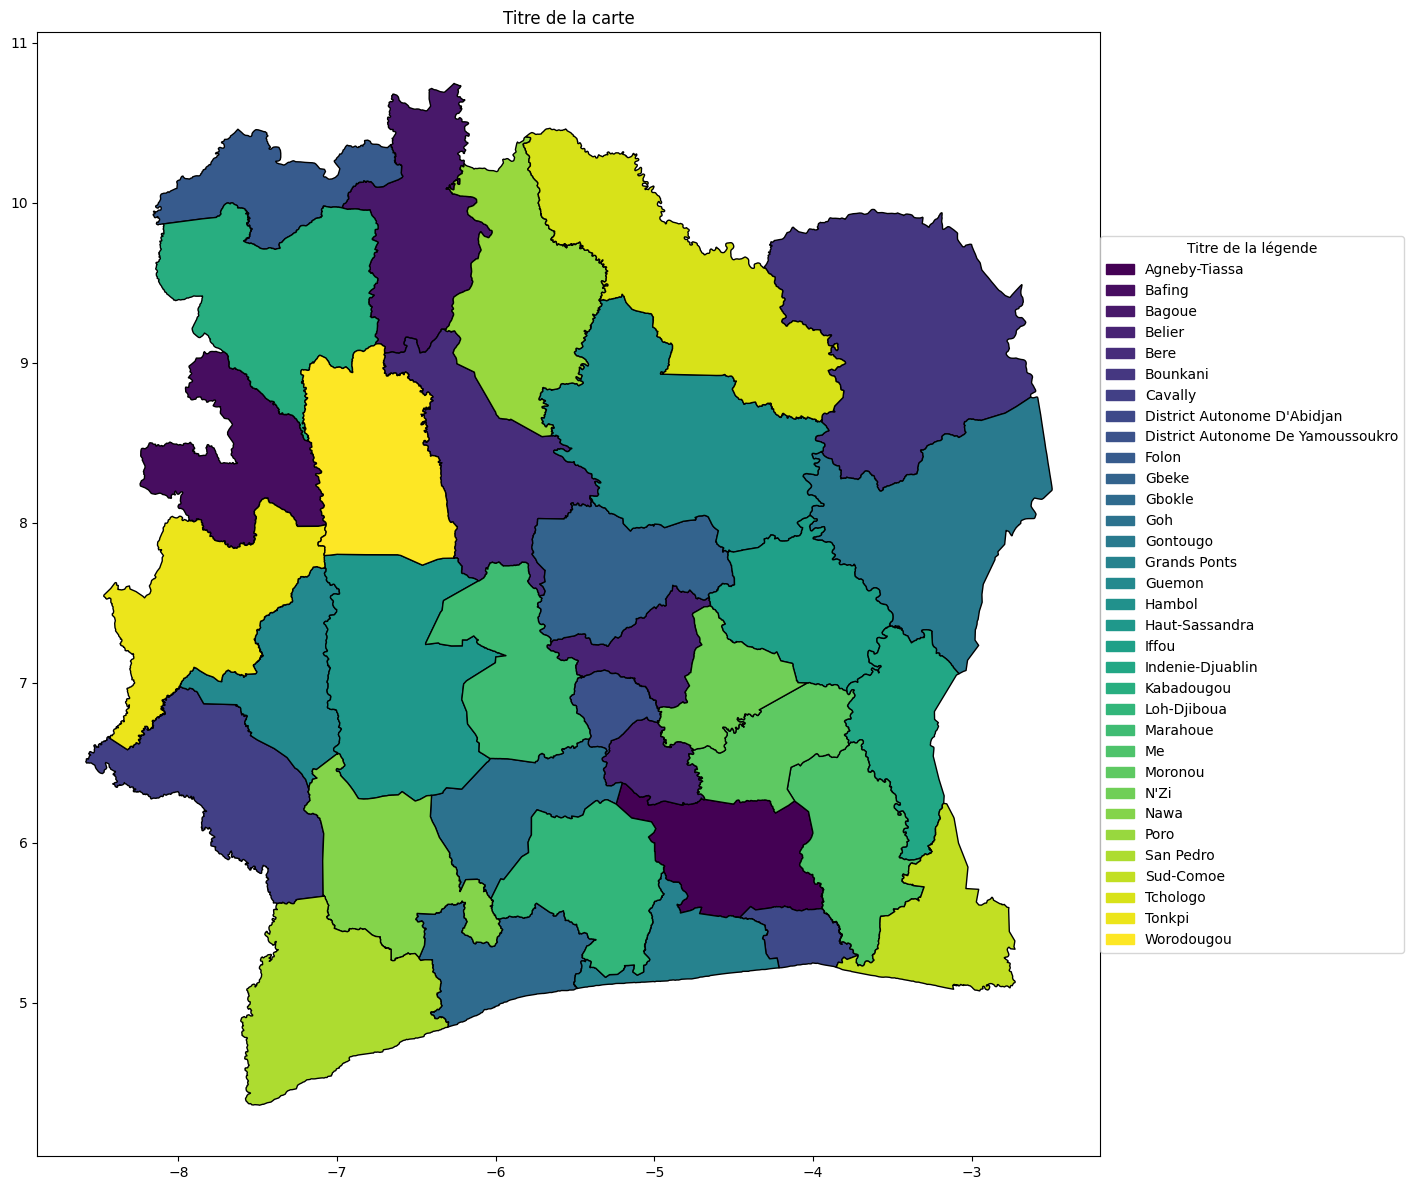

In [159]:
fig = plot_data(gdf)
plt.show()  # Optional: if you want to display the plot

# Importation et fusion de données de fichier csv model avec la table d'attribut de fichier shape des régions

In [ ]:
# Used to create a new file with the geodataframe attributs informations
# gdf.Name.to_csv("data\\csv\\region_data.csv", index=True)

In [ ]:
# Read the CSV file
df = pd.read_csv("/Users/macbookair/Desktop/CartographieMETFPA/carte-dynamique/data/csv/data_model.csv")

# Add a new column 'data' with random values between 200 and 1400
df['data'] = np.random.randint(200, 1401, size=len(df))

# Save the updated DataFrame back to CSV
df.to_csv("/Users/macbookair/Desktop/CartographieMETFPA/carte-dynamique/data/csv/data_model.csv", index=False)

#print(df.head())  # Preview the first few rows
print("\nColumn statistics:")
df['data'].describe()


Column statistics:


count      33.000000
mean      746.363636
std       333.868220
min       201.000000
25%       607.000000
50%       725.000000
75%       914.000000
max      1381.000000
Name: data, dtype: float64

In [169]:
# Join data from dataframe B with dataframe A
merged = pd.merge(df, gdf, left_on='Name', right_on='Name', how='inner')
merged.head()

,Num,Name,data,Zone,geometry
0,0,Agneby-Tiassa,945,Zone sans coopérative,"POLYGON Z ((-5.09329 6.28721 0, -5.09087 6.284..."
1,1,Bafing,666,Zone avec coop,"POLYGON Z ((-7.77733 9.06986 0, -7.77525 9.069..."
2,2,Bagoue,298,Zone avec coop,"POLYGON Z ((-6.23341 10.73216 0, -6.23138 10.7..."
3,3,Belier,891,Zone avec coop,"MULTIPOLYGON Z (((-5.03551 6.7668 0, -5.0331 6..."
4,4,Bere,1292,Zone avec coop,"POLYGON Z ((-6.32844 9.20994 0, -6.32627 9.208..."


In [170]:
# Create a new column which concatenates the name column in the data column
merged["data_label"] = merged["Name"] + "\n" + merged["data"].astype(str)

In [168]:
merged.head()

,Num,Name,data,Zone,geometry
0,0,Agneby-Tiassa,Agneby-Tiassa\n645,Zone sans coopérative,"POLYGON Z ((-5.09329 6.28721 0, -5.09087 6.284..."
1,1,Bafing,Bafing\n661,Zone avec coop,"POLYGON Z ((-7.77733 9.06986 0, -7.77525 9.069..."
2,2,Bagoue,Bagoue\n501,Zone avec coop,"POLYGON Z ((-6.23341 10.73216 0, -6.23138 10.7..."
3,3,Belier,Belier\n398,Zone avec coop,"MULTIPOLYGON Z (((-5.03551 6.7668 0, -5.0331 6..."
4,4,Bere,Bere\n711,Zone avec coop,"POLYGON Z ((-6.32844 9.20994 0, -6.32627 9.208..."


# Fonction définitive de création de la carte

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot
import numpy as np
from shapely.geometry import Polygon, MultiPolygon

def plot_choropleth(geodf, column_to_plot, label_column, label_title = None, title=None, cmap='plasma'):
    """
    Create a choropleth map with a continuous color scale and labels at polygon centers.

    Parameters:
    -----------
    geodf : GeoDataFrame
        The input GeoDataFrame to be plotted
    column_to_plot : str
        The numeric column to use for color scaling
    label_column : str
        The column containing labels to display at polygon centers
    title : str, optional
        Custom title for the map
    cmap : str, optional
        Colormap to use (default is 'plasma')

    Returns:
    --------
    matplotlib.figure.Figure
        The created figure object
    """
    # Create the plot
    fig, ax = plt.subplots(figsize=(20, 17))

    vmin = geodf[column_to_plot].min()
    vmax = geodf[column_to_plot].max()
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.cm.get_cmap(cmap)

    for idx, row in geodf.iterrows():
        if row.geometry.geom_type == 'Polygon':
            polygons = [row.geometry]
        else:  # MultiPolygon
            polygons = list(row.geometry.geoms)

        for poly in polygons:
            x, y = poly.exterior.xy
            ax.fill(x, y, color=cmap(norm(row[column_to_plot])), edgecolor='black', linewidth=0.5)

            # Compute centroid and add label
            centroid = poly.centroid
            ax.text(centroid.x, centroid.y, str(row[label_column]), fontsize=15, ha='center', va='center', color='black')

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
    cbar.set_label(label_title or column_to_plot)

    # Set title and adjust layout
    plt.title(title or f'Choropleth Map of {column_to_plot}',fontsize=25)
    plt.tight_layout()

    return fig

C:\Users\kanic\AppData\Local\Temp\ipykernel_30716\225349325.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)


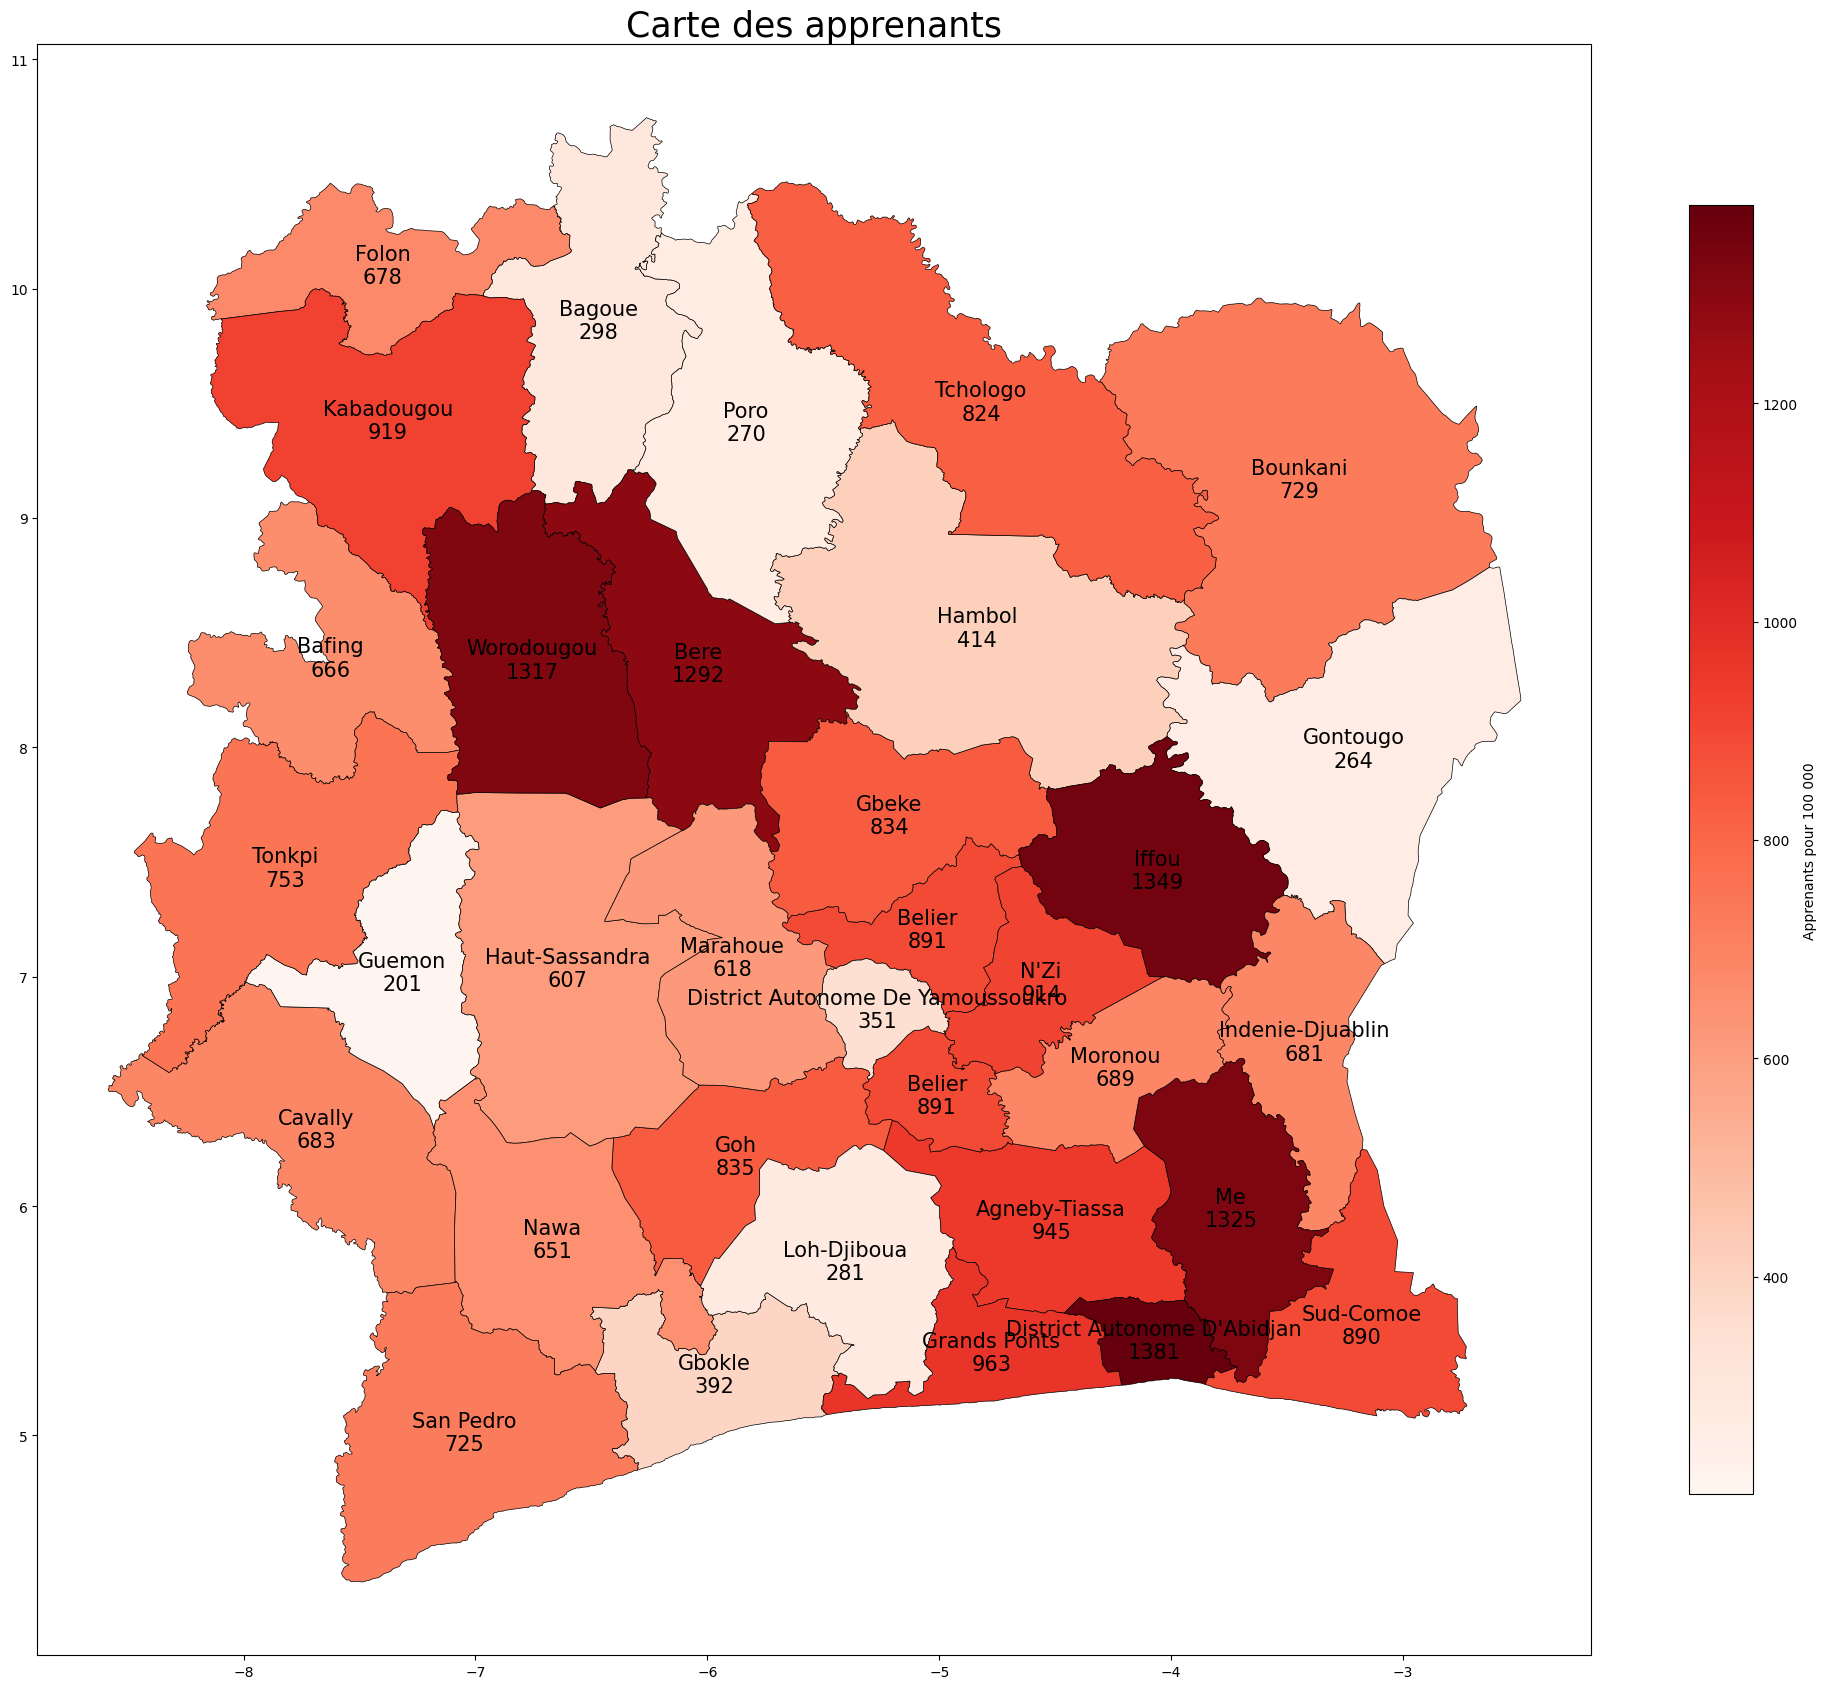

In [172]:
fig = plot_choropleth(merged, 'data', 'data_label', label_title="Apprenants pour 100 000", title='Carte des apprenants',cmap="Reds")
plt.show()